# Capstone Project: Credit Risk Assessment

## Business Understanding

From a business perspective, the objective is to understand and identify key drivers for an individual's Credit Risk Score. Through these key drivers, the Credit Risk Score of an individual can then be predicted and used to determine whether credit facilities applied by the individual should be approved.  
  
1. Identify features of the dataset that drive the Credit Risk Score ('RiskScore'). The dataset includes the following columns:
   - ApplicationDate: Loan application date
   - Age: Applicant's age
   - AnnualIncome: Yearly income
   - CreditScore: Creditworthiness score
   - EmploymentStatus: Job situation
   - EducationLevel: Highest education attained
   - Experience: Work experience
   - LoanAmount: Requested loan size
   - LoanDuration: Loan repayment period
   - MaritalStatus: Applicant's marital state
   - NumberOfDependents: Number of dependents
   - HomeOwnershipStatus: Homeownership type
   - MonthlyDebtPayments: Monthly debt obligations
   - CreditCardUtilizationRate: Credit card usage percentage
   - NumberOfOpenCreditLines: Active credit lines
   - NumberOfCreditInquiries: Credit checks count
   - DebtToIncomeRatio: Debt to income proportion
   - BankruptcyHistory: Bankruptcy records
   - LoanPurpose: Reason for loan
   - PreviousLoanDefaults: Prior loan defaults
   - PaymentHistory: Past payment behavior
   - LengthOfCreditHistory: Credit history duration
   - SavingsAccountBalance: Savings account amount
   - CheckingAccountBalance: Checking account funds
   - TotalAssets: Total owned assets
   - TotalLiabilities: Total owed debts
   - MonthlyIncome: Income per month
   - UtilityBillsPaymentHistory: Utility payment record
   - JobTenure: Job duration
   - NetWorth: Total financial worth
   - BaseInterestRate: Starting interest rate
   - InterestRate: Applied interest rate
   - MonthlyLoanPayment: Monthly loan payment
   - TotalDebtToIncomeRatio: Total debt against income
   - LoanApproved: Loan approval status
   - RiskScore: Risk assessment score (lower score implies higher credit quality)

2. Build a suitable model on the selected features and assess if the model and features can be used to determine the Risk Score with reasonable accuracy.

3. Apply the model to predict the Risk Score of new credit facility applicants - the predicted Risk Score is used to determine whether the application should be approved.  

## Data Understanding

After considering the business understanding, the next step is to get to know the dataset, explore what information it contains, and assess if there are data quality issues.

Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
#import plotly.express as px
import matplotlib.pyplot as plt
import math

from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
#from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
#from sklearn.compose import make_column_transformer
from sklearn.metrics import mean_squared_error, r2_score
#from sklearn.inspection import permutation_importance
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
import graphviz

Import Data

In [2]:
raw_data = pd.read_csv('data/Loan.csv')

Perform Exploratory Data Analysis (EDA)

In [3]:
raw_data.tail()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
19995,2072-09-29,44,30180,587,Employed,High School,19,24521,36,Married,...,2515.000000,0.826217,1,55327,0.216021,0.195574,905.767712,0.627741,0,55.0
19996,2072-09-30,56,49246,567,Employed,Associate,33,25818,36,Married,...,4103.833333,0.816618,3,64002,0.227318,0.199168,958.395633,0.334418,0,54.0
19997,2072-10-01,44,48958,645,Employed,Bachelor,20,37033,72,Married,...,4079.833333,0.887216,3,103663,0.229533,0.226766,945.427454,0.357227,0,45.0
19998,2072-10-02,60,41025,560,Employed,High School,36,14760,72,Married,...,3418.750000,0.843787,5,10600,0.249760,0.264873,411.168284,0.408678,0,59.0
19999,2072-10-03,20,53227,574,Employed,Associate,0,32055,48,Married,...,4435.583333,0.853801,5,41372,0.240055,0.242693,1049.830407,0.298006,0,59.0


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

Target: 'RiskScore'  
Numerical Features (excluding target): 29  
Categorical Features: 6  

**Assessment:** The data has no null values that require data cleaning.

Assess Categorical Columns

In [5]:
for col in raw_data.select_dtypes(include=['object', 'category']).columns:
    print(raw_data[col].value_counts())
    print("\n")

ApplicationDate
2072-09-17    1
2072-09-16    1
2072-09-15    1
2072-09-14    1
2072-09-13    1
             ..
2018-01-05    1
2018-01-04    1
2018-01-03    1
2018-01-02    1
2018-01-01    1
Name: count, Length: 20000, dtype: int64


EmploymentStatus
Employed         17036
Self-Employed     1573
Unemployed        1391
Name: count, dtype: int64


EducationLevel
Bachelor       6054
High School    5908
Associate      4034
Master         3050
Doctorate       954
Name: count, dtype: int64


MaritalStatus
Married     10041
Single       6078
Divorced     2882
Widowed       999
Name: count, dtype: int64


HomeOwnershipStatus
Mortgage    7939
Rent        6087
Own         3938
Other       2036
Name: count, dtype: int64


LoanPurpose
Home                  5925
Debt Consolidation    5027
Auto                  4034
Education             3008
Other                 2006
Name: count, dtype: int64




**Assessment:** Drop 'ApplicationDate' as this is not useful for predicting 'RiskScore'.

In [6]:
cat_cols_to_drop = ['ApplicationDate']

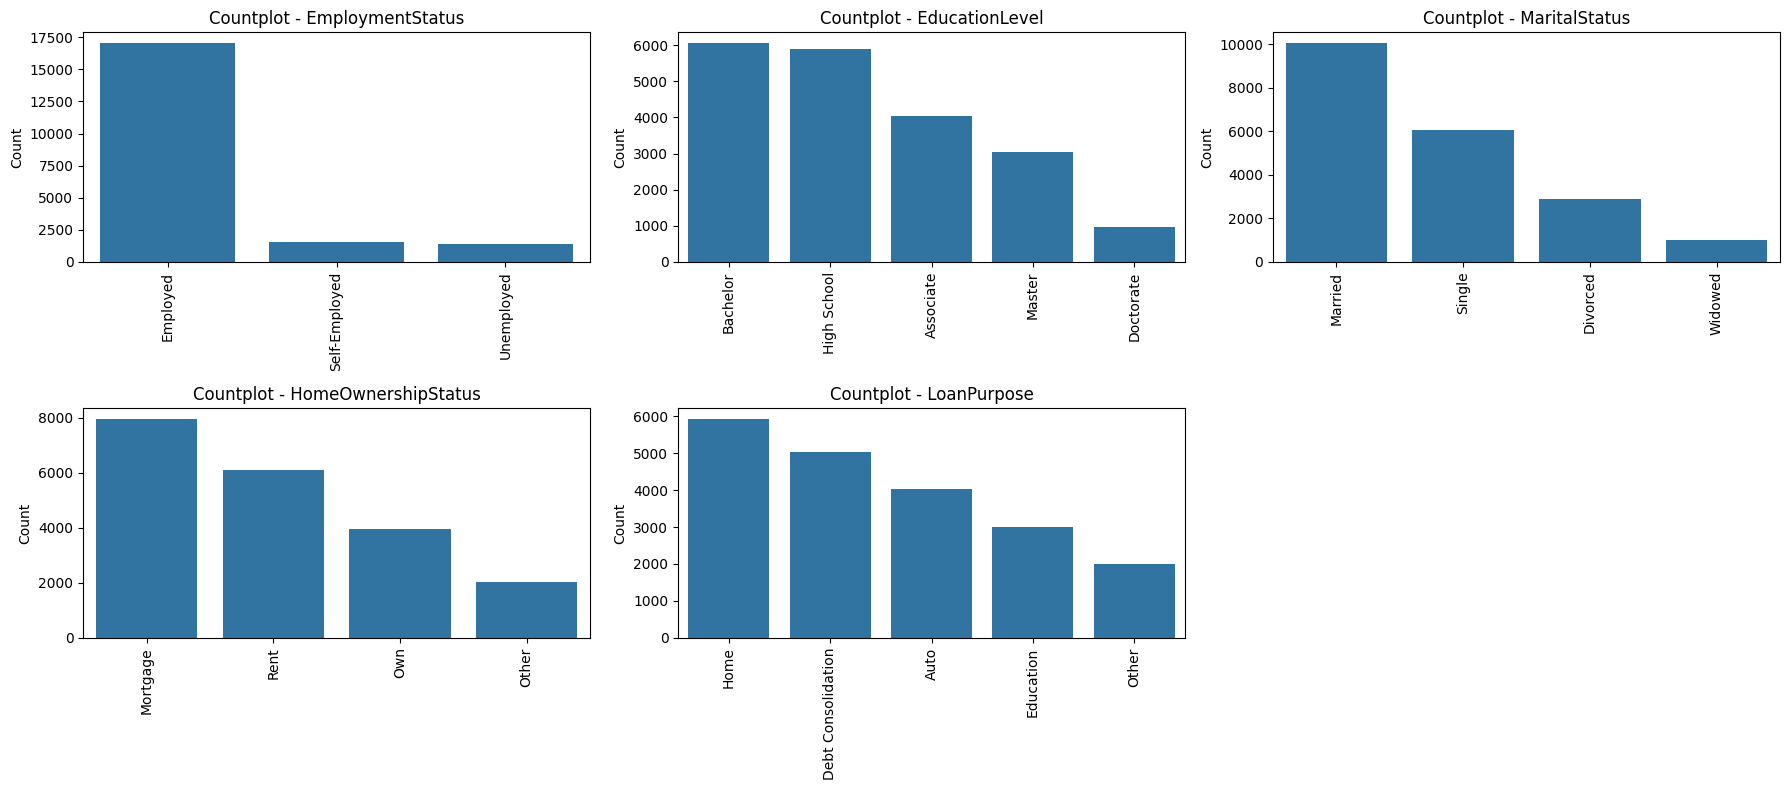

In [7]:
# Plot counts of Categorical Columns

cat_cols = raw_data.select_dtypes(include = ['object', 'category']).columns.drop(cat_cols_to_drop)
n_cols = 3 # number of subplots per row
n_rows = math.ceil(len(cat_cols) / n_cols) # number of rows

fig, axes = plt.subplots(n_rows, n_cols, figsize = (6 * n_cols, 4 * n_rows), squeeze = False)
axes = axes.flatten()  # flatten to 1D to simplify indexing

for i, col in enumerate(cat_cols):
    sns.countplot(data = raw_data, x = col, order = raw_data[col].value_counts().index, ax = axes[i])
    axes[i].tick_params(axis = 'x', rotation = 90)
    axes[i].set_xlabel(None)
    axes[i].set_ylabel('Count')
    axes[i].set_title('Countplot - ' + col)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j]) # remove unused subplots in grid

plt.tight_layout()
plt.savefig('images/Countplot - Categorical Columns.png')
plt.show()

**Assessment:** No data values with unusually low count that needs to be consolidated to reduce number of features (i.e introduced by One-Hot Encoding).

Assess Numerical Columns

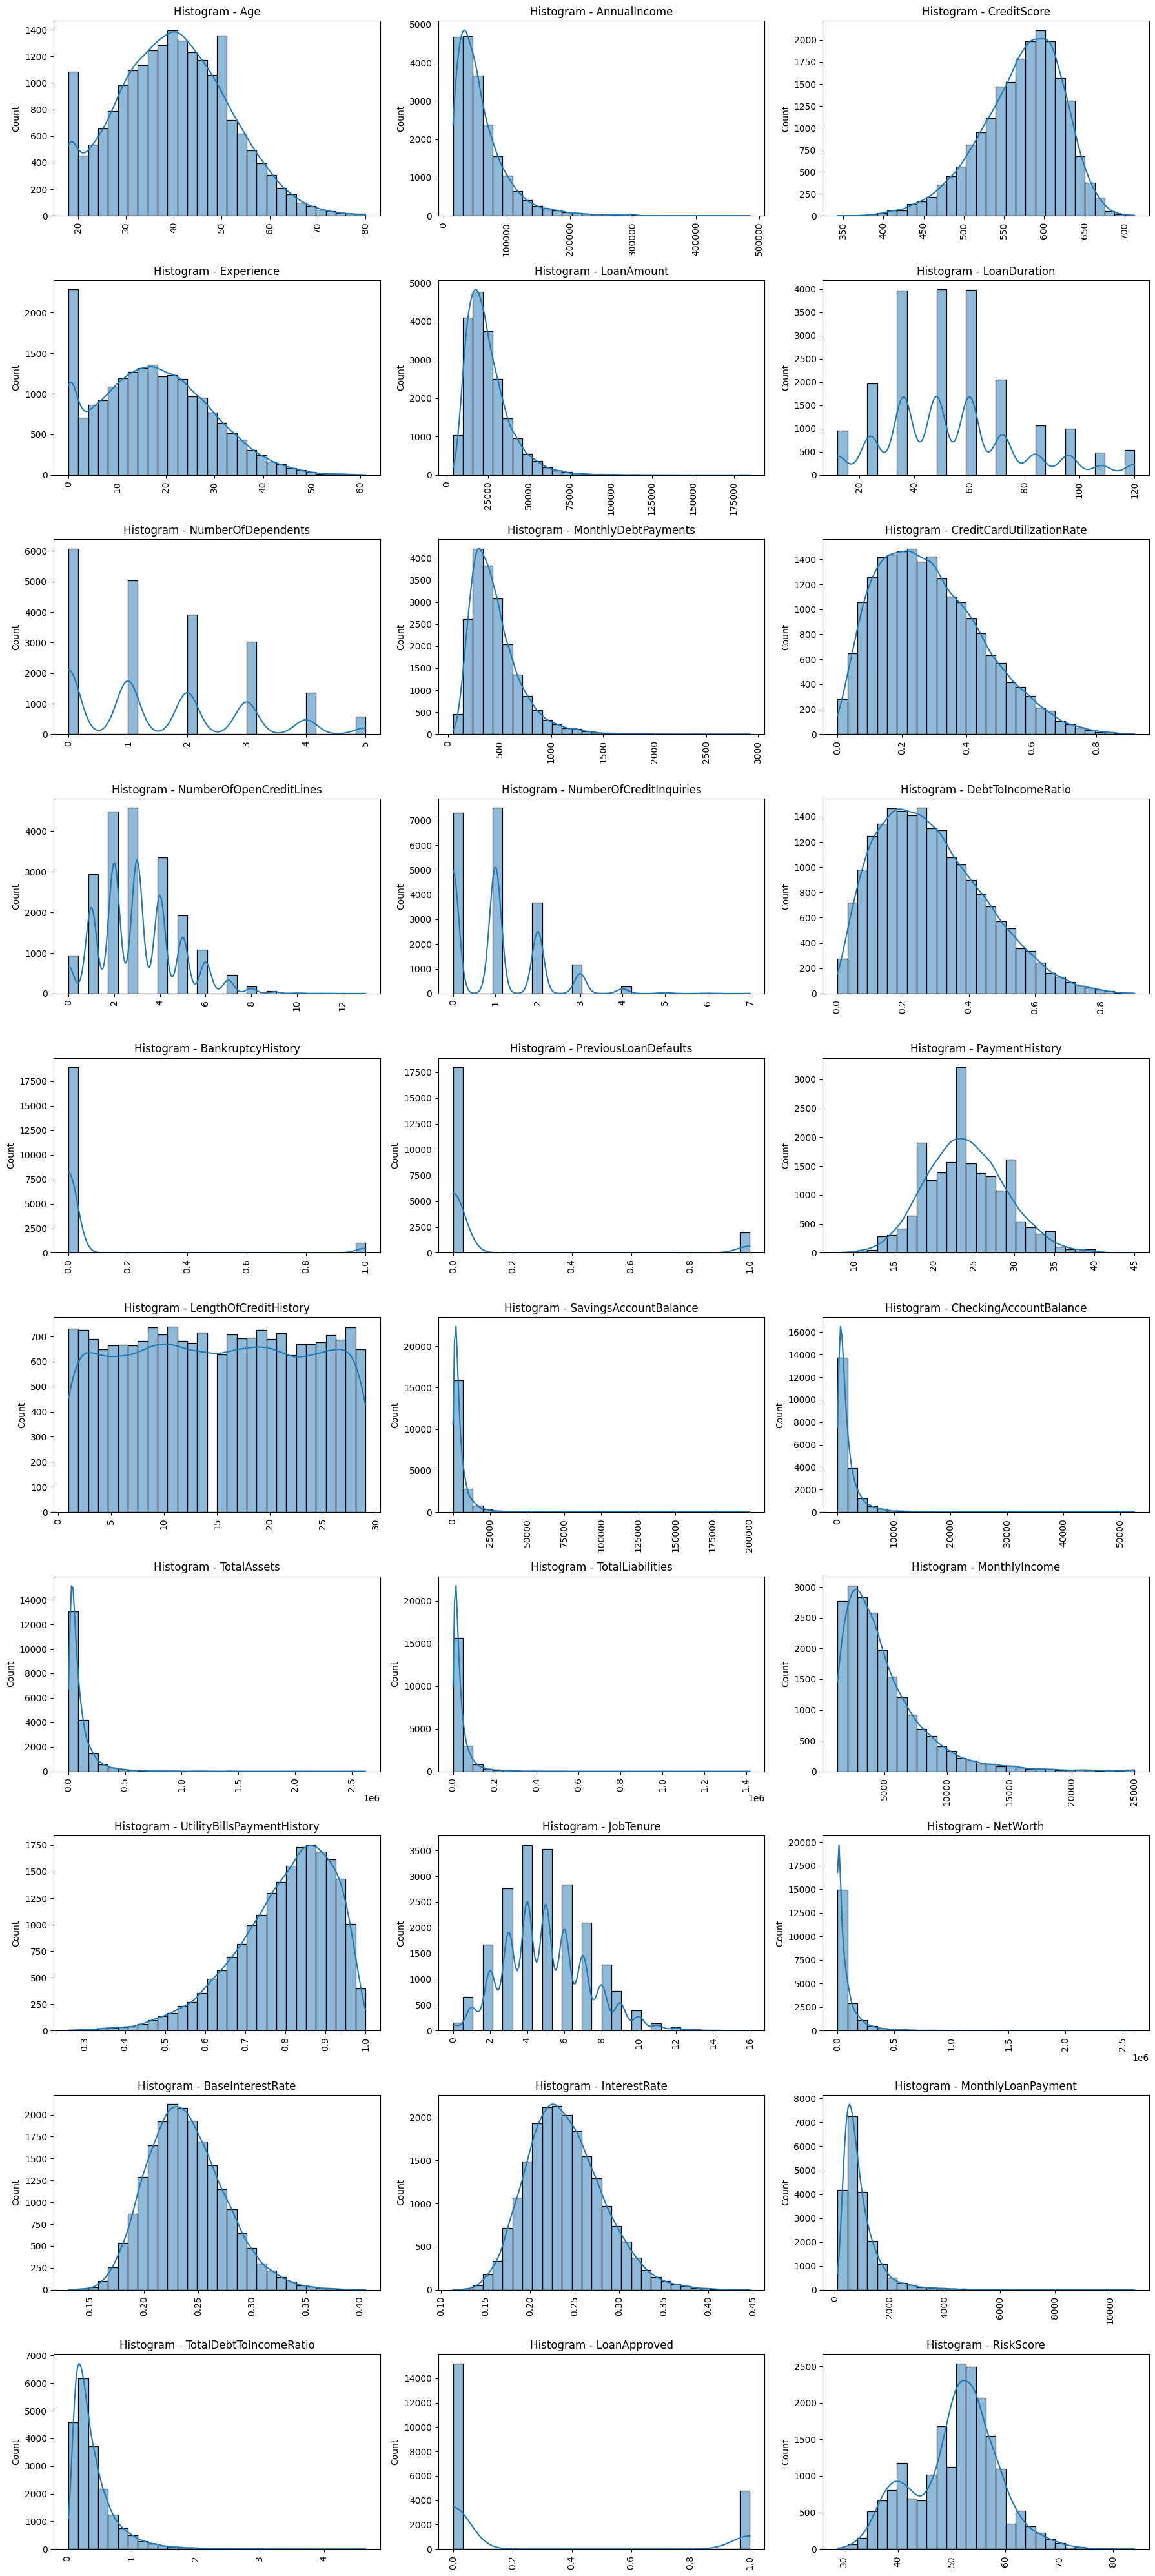

In [8]:
# Plot histograms of Numerical Columns

num_cols = raw_data.select_dtypes(include = 'number').columns
n_cols = 3 # number of subplots per row
n_rows = math.ceil(len(num_cols) / n_cols) # number of rows

fig, axes = plt.subplots(n_rows, n_cols, figsize = (6 * n_cols, 4 * n_rows), squeeze = False)
axes = axes.flatten()  # flatten to 1D to simplify indexing

for i, col in enumerate(num_cols):
    sns.histplot(data = raw_data, x = col, bins = 30, kde = True, ax = axes[i])
    axes[i].tick_params(axis = 'x', rotation = 90)
    axes[i].set_xlabel(None)
    axes[i].set_ylabel('Count')
    axes[i].set_title('Histogram - ' + col)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j]) # remove unused subplots in grid

plt.tight_layout()
plt.savefig('images/Histogram - Numerical Columns.png')
plt.show()

**Assessment:** No obvious outliers nor incorrect data in the numerical columns.


In [9]:
raw_data.describe()

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,39.752600,59161.473550,571.612400,17.522750,24882.867800,54.057000,1.517300,454.292700,0.286381,3.023350,...,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000,50.766780
std,11.622713,40350.845168,50.997358,11.316836,13427.421217,24.664857,1.386325,240.507609,0.159793,1.736161,...,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483,7.778262
min,18.000000,15000.000000,343.000000,0.000000,3674.000000,12.000000,0.000000,50.000000,0.000974,0.000000,...,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000,28.800000
25%,32.000000,31679.000000,540.000000,9.000000,15575.000000,36.000000,0.000000,286.000000,0.160794,2.000000,...,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000,46.000000
50%,40.000000,48566.000000,578.000000,17.000000,21914.500000,48.000000,1.000000,402.000000,0.266673,3.000000,...,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000,52.000000
75%,48.000000,74391.000000,609.000000,25.000000,30835.000000,72.000000,2.000000,564.000000,0.390634,4.000000,...,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770759,0.509214,0.000000,56.000000
max,80.000000,485341.000000,712.000000,61.000000,184732.000000,120.000000,5.000000,2919.000000,0.917380,13.000000,...,25000.000000,0.999433,16.000000,2.603208e+06,0.405029,0.446787,10892.629520,4.647657,1.000000,84.000000


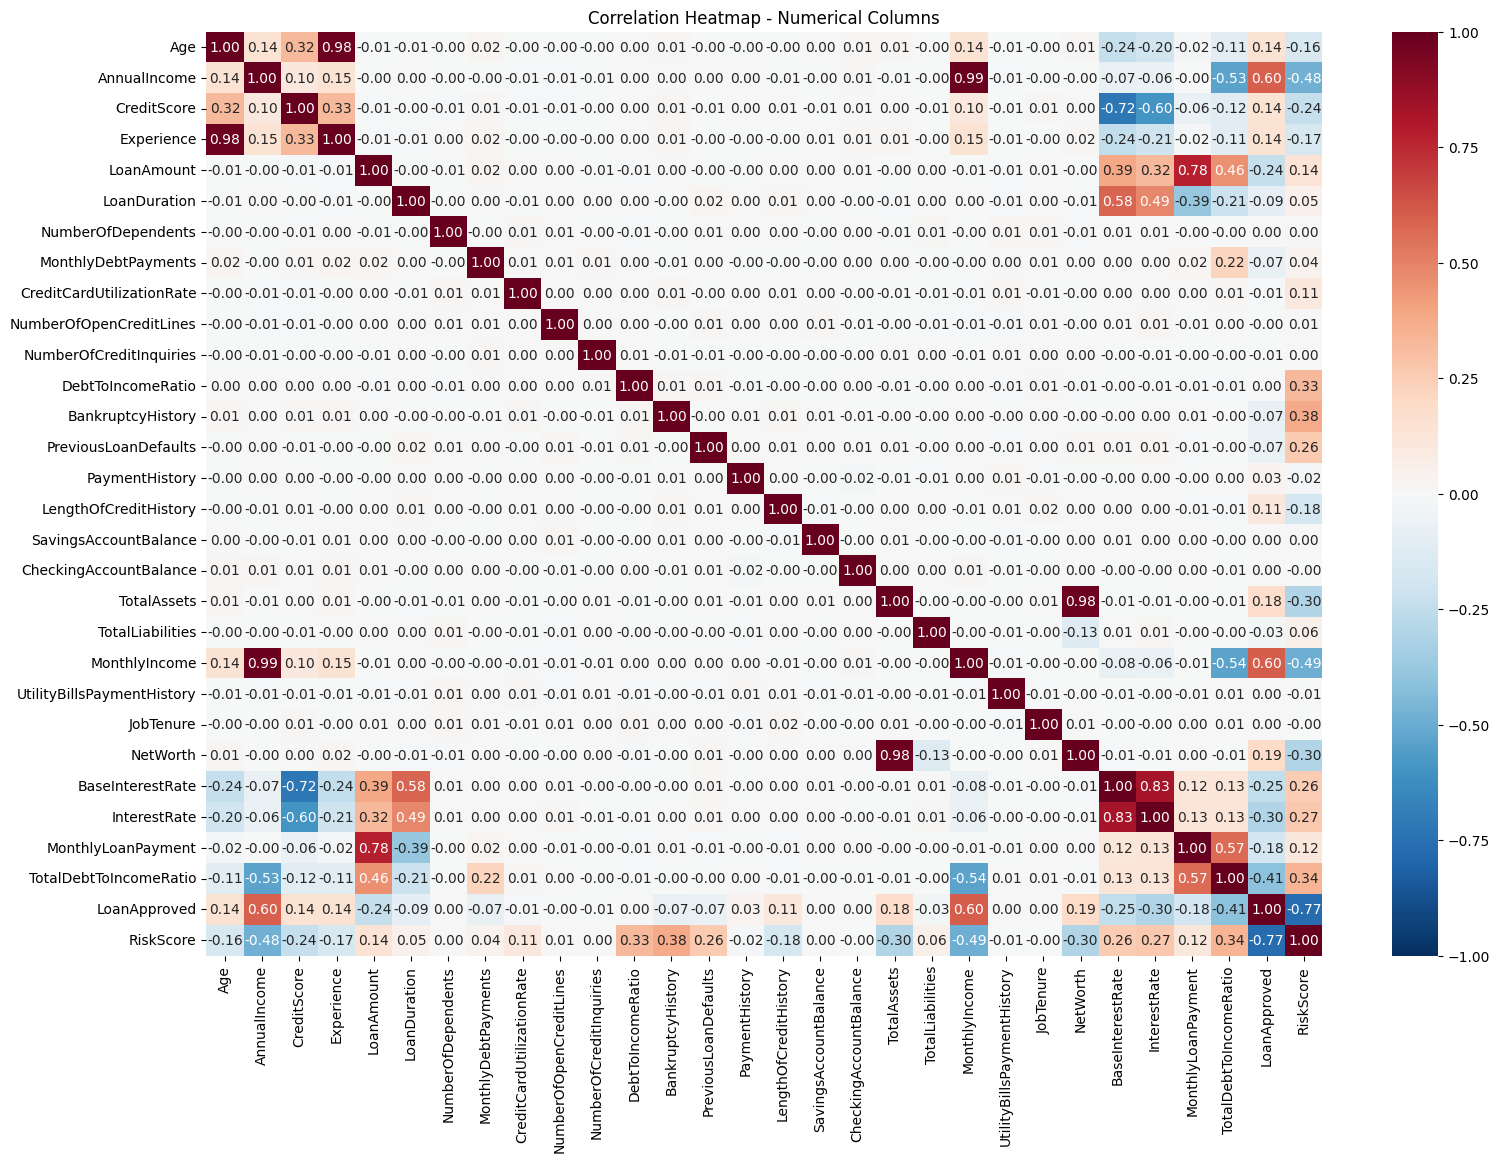

In [10]:
# Generate correlation matrix across numerical columns
corr = raw_data.corr(numeric_only = True)
plt.figure(figsize = (18, 12))
sns.heatmap(corr, annot = True, fmt = '.2f', cmap = 'RdBu_r', center = 0, vmin = -1, vmax = 1, cbar = True)
plt.title('Correlation Heatmap - Numerical Columns')
plt.savefig('images/Correlation Heatmap - Numerical Columns.png')
plt.show()

**Assessment:** High correlation between
- 'Age' and 'Experience': Drop 'Experience' as a feature.
- 'AnnualIncome' and 'MonthlyIncome': Drop 'MonthlyIncome'.
- 'LoanAmount' and 'MonthlyLoanPayment': Drop 'MonthlyLoanPayment'.
- 'TotalAssets' and 'NetWorth': Drop 'NetWorth'.
- 'BaseInterestRate' and 'InterestRate': Drop 'BaseInterestRate'.
- 'NumberOfDependents', 'NumberOfOpenCreditLines', 'NumberOfCreditInquiries', 'PaymentHistory', 'SavingsAccountBalance', 'CheckingAccountBalance', 'UtilityBillsPaymentHistory', 'JobTenure' have close to zero correlation with all other columns: Drop these 8 columns.

In [11]:
num_cols_to_drop = ['Experience','MonthlyIncome','MonthlyLoanPayment','NetWorth','BaseInterestRate','NumberOfDependents', 'NumberOfOpenCreditLines', 'NumberOfCreditInquiries', 'PaymentHistory', 'SavingsAccountBalance', 'CheckingAccountBalance', 'UtilityBillsPaymentHistory', 'JobTenure']

## Data Preparation

After EDA is completed and business understanding fine-tuned, the final dataset is constructed prior to modeling.

Selected Features

In [12]:
cols_to_drop = cat_cols_to_drop + num_cols_to_drop
data = raw_data.drop(cols_to_drop, axis=1)

In [13]:
target = 'RiskScore'
num_features = data.select_dtypes(include = 'number').columns.drop(target)
cat_features = data.select_dtypes(include = ['object', 'category']).columns

print(f'Target: ' + target)
print(f'Numerical Features ({len(num_features)}): {", ".join(num_features)}')
print(f'Categorical Features ({len(cat_features)}): {", ".join(cat_features)}')

Target: RiskScore
Numerical Features (16): Age, AnnualIncome, CreditScore, LoanAmount, LoanDuration, MonthlyDebtPayments, CreditCardUtilizationRate, DebtToIncomeRatio, BankruptcyHistory, PreviousLoanDefaults, LengthOfCreditHistory, TotalAssets, TotalLiabilities, InterestRate, TotalDebtToIncomeRatio, LoanApproved
Categorical Features (5): EmploymentStatus, EducationLevel, MaritalStatus, HomeOwnershipStatus, LoanPurpose


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        20000 non-null  int64  
 1   AnnualIncome               20000 non-null  int64  
 2   CreditScore                20000 non-null  int64  
 3   EmploymentStatus           20000 non-null  object 
 4   EducationLevel             20000 non-null  object 
 5   LoanAmount                 20000 non-null  int64  
 6   LoanDuration               20000 non-null  int64  
 7   MaritalStatus              20000 non-null  object 
 8   HomeOwnershipStatus        20000 non-null  object 
 9   MonthlyDebtPayments        20000 non-null  int64  
 10  CreditCardUtilizationRate  20000 non-null  float64
 11  DebtToIncomeRatio          20000 non-null  float64
 12  BankruptcyHistory          20000 non-null  int64  
 13  LoanPurpose                20000 non-null  obj

In [15]:
data.describe()

,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MonthlyDebtPayments,CreditCardUtilizationRate,DebtToIncomeRatio,BankruptcyHistory,PreviousLoanDefaults,LengthOfCreditHistory,TotalAssets,TotalLiabilities,InterestRate,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000
mean,39.752600,59161.473550,571.612400,24882.867800,54.057000,454.292700,0.286381,0.285735,0.052400,0.100050,14.957300,9.696440e+04,3.625241e+04,0.239110,0.402182,0.239000,50.766780
std,11.622713,40350.845168,50.997358,13427.421217,24.664857,240.507609,0.159793,0.160211,0.222838,0.300074,8.371552,1.207999e+05,4.725151e+04,0.042205,0.338924,0.426483,7.778262
min,18.000000,15000.000000,343.000000,3674.000000,12.000000,50.000000,0.000974,0.001720,0.000000,0.000000,1.000000,2.098000e+03,3.720000e+02,0.113310,0.016043,0.000000,28.800000
25%,32.000000,31679.000000,540.000000,15575.000000,36.000000,286.000000,0.160794,0.161035,0.000000,0.000000,8.000000,3.118025e+04,1.119675e+04,0.209142,0.179693,0.000000,46.000000
50%,40.000000,48566.000000,578.000000,21914.500000,48.000000,402.000000,0.266673,0.264454,0.000000,0.000000,15.000000,6.069900e+04,2.220300e+04,0.235390,0.302711,0.000000,52.000000
75%,48.000000,74391.000000,609.000000,30835.000000,72.000000,564.000000,0.390634,0.390327,0.000000,0.000000,22.000000,1.174052e+05,4.314650e+04,0.265532,0.509214,0.000000,56.000000
max,80.000000,485341.000000,712.000000,184732.000000,120.000000,2919.000000,0.917380,0.902253,1.000000,1.000000,29.000000,2.619627e+06,1.417302e+06,0.446787,4.647657,1.000000,84.000000


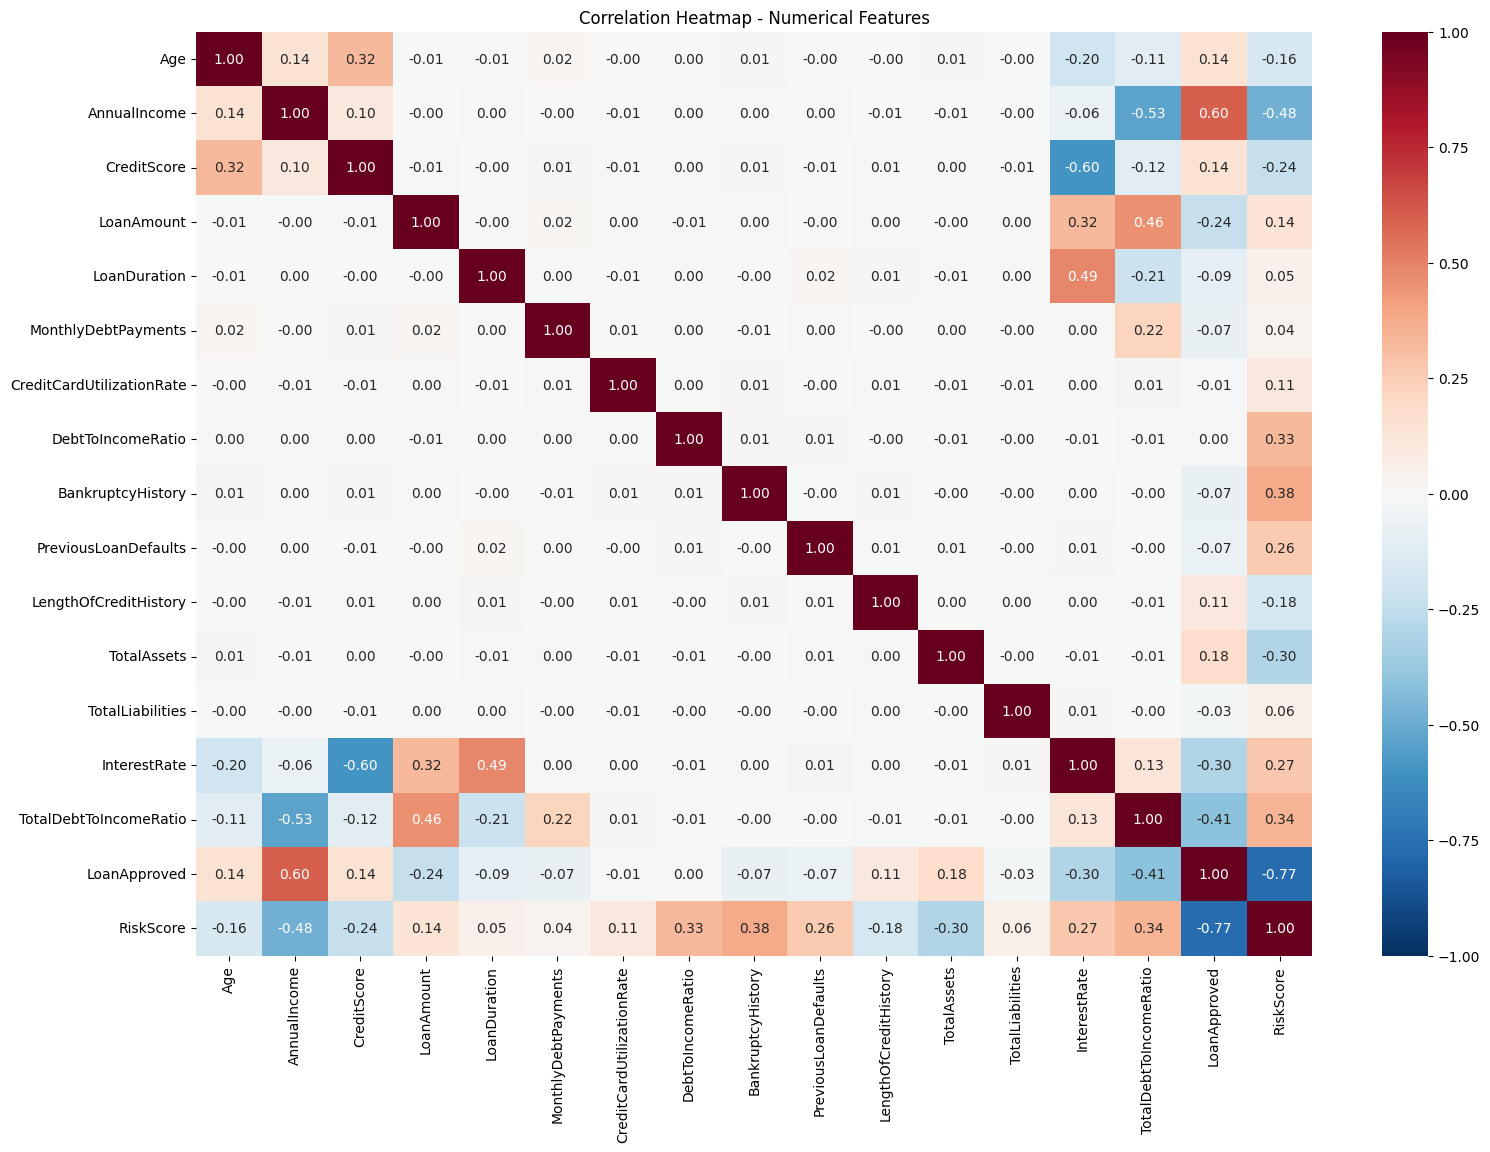

In [16]:
# Generate correlation matrix based on selected numerical columns
corr = data.corr(numeric_only = True)
plt.figure(figsize = (18, 12))
sns.heatmap(corr, annot = True, fmt = '.2f', cmap = 'RdBu_r', center = 0, vmin = -1, vmax = 1, cbar = True)
plt.title('Correlation Heatmap - Numerical Features')
plt.savefig('images/Correlation Heatmap - Numerical Features.png')
plt.show()

In [17]:
# Plot scatterplot for selected numerical columns against target by selected categorical columns

n_rows = len(num_features)
n_cols = len(cat_features)

fig, axes = plt.subplots(n_rows, n_cols, figsize = (6*n_cols, 4*n_rows), squeeze = False)

for i, num_col in enumerate(num_features):
    for j, cat_col in enumerate(cat_features):
        sns.scatterplot(data = data, x = num_col, y = target, hue = cat_col, ax = axes[i, j], palette = 'tab10')
        axes[i, j].set_xlabel(num_col)
        axes[i, j].set_ylabel(target)
        axes[i, j].set_title(f'{target} vs {num_col} by {cat_col}')
        axes[i, j].legend(loc='best', fontsize=8, title = cat_col)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j]) # remove unused subplots in grid

plt.tight_layout()
plt.savefig('images/Scatterplot - RiskScore vs Numerical Features by Categorical Features.png')
plt.close() # close the image as it is too large to be loaded in GitHub

**Assessment:** Lower Risk Score is associated with: higher AnnualIncome, higher CreditScore, higher TotalAssets, lower DebtToIncomeRatio, BankruptcyHistory = False, PreviousLoanDefaults = False, LoanApproved = True.

PCA Assessment

In [18]:
# extract numerical features
data_num = data[num_features]

# standardize numerical features
scaler = StandardScaler()
data_num_scaled = scaler.fit_transform(data_num)

# fit PCA on scaled numerical features
pca = PCA()
pca.fit(data_num_scaled)

# extract explained variance
explained_variance = pca.explained_variance_ratio_
cum_explained_variance = np.cumsum(explained_variance)

# create dataframe on explained variance
df_variance = pd.DataFrame()
df_variance['PC'] = range(1, len(explained_variance) + 1)
df_variance['Explained Variance'] = explained_variance
df_variance['Cumulative Explained Variance'] = cum_explained_variance

df_variance.set_index('PC', inplace = True)

In [19]:
print(df_variance)

    Explained Variance  Cumulative Explained Variance
PC                                                   
1             0.157338                       0.157338
2             0.105218                       0.262556
3             0.074294                       0.336850
4             0.071526                       0.408377
5             0.063903                       0.472280
6             0.063397                       0.535677
7             0.062981                       0.598657
8             0.062415                       0.661072
9             0.061976                       0.723047
10            0.061669                       0.784716
11            0.061241                       0.845958
12            0.060602                       0.906560
13            0.045262                       0.951822
14            0.025794                       0.977616
15            0.012784                       0.990400
16            0.009600                       1.000000


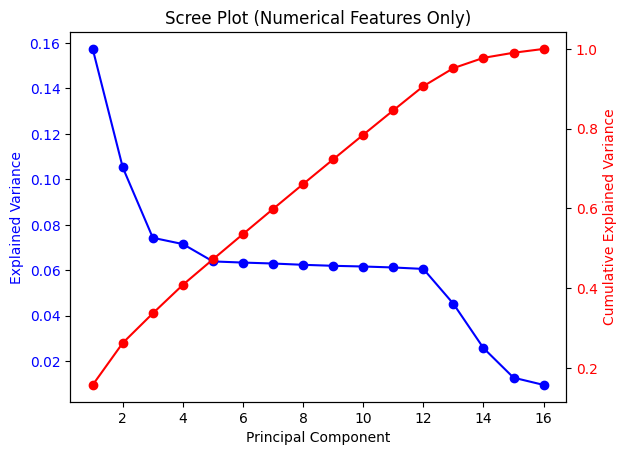

In [20]:
# plot Scree Plot to define number of PCA components required
fig, ax1 = plt.subplots()

# first column on left y-axis
ax1.plot(df_variance.index, df_variance['Explained Variance'], marker = 'o', color = 'blue')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Explained Variance', color = 'blue')
ax1.tick_params(axis = 'y', labelcolor = 'blue')

# second column on right y-axis
ax2 = ax1.twinx()  # create a second y-axis sharing the same x-axis
ax2.plot(df_variance.index, df_variance['Cumulative Explained Variance'], marker = 'o', color = 'red')
ax2.set_ylabel('Cumulative Explained Variance', color = 'red')
ax2.tick_params(axis = 'y', labelcolor = 'red')

plt.title('Scree Plot (Numerical Features Only)')
plt.savefig('images/Scree Plot (Numerical Features Only)')
plt.show()

**Assessment:**
- 12 principal components were required to explain at least 90% of the variance, indicating that PCA did not substantially reduce the dimensionality of the dataset.
- Given the limited dimensionality reduction and the reduced interpretability of features introduced by PCA, it will not be applied in the subsequent modelling.

Note: PCA should be fitted only on the training data to prevent information leakage from the test set and ensure an unbiased model evaluation.

Prepare Dataset for Modelling

In [21]:
# shuffle data in case there is any ordering within the data
data = shuffle(data, random_state = 42)

Split Data

In [22]:
X = data.drop([target], axis=1)
y = data[target]
print(X.head())
print(y.head())

# 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

# Printing shapes of the sets
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape,'\n')


       Age  AnnualIncome  CreditScore EmploymentStatus EducationLevel  \
10650   37        100761          604         Employed    High School   
2041    35        189154          509         Employed    High School   
8668    44         73272          483         Employed    High School   
1114    41         57115          412         Employed         Master   
13902   39         61155          551         Employed         Master   

       LoanAmount  LoanDuration MaritalStatus HomeOwnershipStatus  \
10650       28479            84        Single            Mortgage   
2041        11222            60       Married            Mortgage   
8668        31573            48       Widowed                 Own   
1114        21937            12       Married                Rent   
13902       31510            48      Divorced                Rent   

       MonthlyDebtPayments  ...  DebtToIncomeRatio  BankruptcyHistory  \
10650                   88  ...           0.430751                  0   


## Modelling

A number of different models were built with RiskScore as the target. Additionally, different parameters are explored together with the use of cross-validation.

### Linear Regression (without Regularisation)

Vary Polynomial Degree to get Best Degree

In [23]:
linear_train_rmses = []
linear_train_r2 = []
linear_test_rmses = []
linear_test_r2 = []

# vary degree from 1 to 3
for i in range(1, 4):
    #create pipeline with PolynomialFeatures degree i
    preprocessor_i = ColumnTransformer(
        transformers = [
            ('num_features', make_pipeline(PolynomialFeatures(degree = i, include_bias = False)), num_features),
            ('cat_features', make_pipeline(OneHotEncoder(drop = 'if_binary')), cat_features)
        ]
    )

    linear_pipeline_i = Pipeline([
        ('Preprocessor', preprocessor_i),
        ('Linear_Model', LinearRegression())
    ])

    linear_pipeline_i.fit(X_train, y_train)

    # predict on train and test data
    train_preds = linear_pipeline_i.predict(X_train)
    test_preds = linear_pipeline_i.predict(X_test)

    # store root mean squared error (rmse) for each degree i
    linear_train_rmses.append(np.sqrt(mean_squared_error(y_train, train_preds)))
    linear_train_r2.append(r2_score(y_train, train_preds))
    linear_test_rmses.append(np.sqrt(mean_squared_error(y_test, test_preds)))
    linear_test_r2.append(r2_score(y_test, test_preds))

In [24]:
print('Polynomial Degree:', list(range(1,4)))
print('Train RMSEs:', [f"{rmse:.10f}" for rmse in linear_train_rmses])
print('Test RMSEs:', [f"{rmse:.10f}" for rmse in linear_test_rmses])
print('Train R-squared:', [f"{r2:.10f}" for r2 in linear_train_r2])
print('Test R-squared:', [f"{r2:.10f}" for r2 in linear_test_r2])

Polynomial Degree: [1, 2, 3]
Train RMSEs: ['1.9214593725', '1.7876163291', '2.2556185122']
Test RMSEs: ['1.9470929706', '1.8219835996', '2.4854574601']
Train R-squared: ['0.9394345342', '0.9475782789', '0.9165370080']
Test R-squared: ['0.9353424403', '0.9433845637', '0.8946441634']


In [25]:
# extract RMSE and R-squared
poly_best_idx = linear_test_rmses.index(min(linear_test_rmses))

In [26]:
print('Linear Regression Best polynomial: Degree ' f'{poly_best_idx + 1}') # index starts from zero

Linear Regression Best polynomial: Degree 2


**Assessment:**
- Polynomial Degree: [1, 2, 3]
- Train RMSEs: ['1.9214593725', '1.7876163291', '2.2556185122']
- Test RMSEs: ['1.9470929706', '1.8219835996', '2.4854574601']
- Train R-squared: ['0.9394345342', '0.9475782789', '0.9165370080']
- Test R-squared: ['0.9353424403', '0.9433845637', '0.8946441634']
- Polynomial of degree 2 for numeric features yields the best results with the lowest Train RMSE, Test RMSE, and highest Train R-squared, Test R-squared. This will be used in subsequent models.

In [27]:
# re-create pipeline with PolynomialFeatures degree 2
preprocessor = ColumnTransformer(
    transformers = [
        ('num_features', make_pipeline(PolynomialFeatures(degree = 2, include_bias = False)), num_features),
        ('cat_features', make_pipeline(OneHotEncoder(drop = 'if_binary')), cat_features)
    ]
)

linear_pipeline = Pipeline([
    ('Preprocessor', preprocessor),
    ('Linear_Model', LinearRegression())
])

linear_pipeline.fit(X_train, y_train)

# predict on train and test data
train_preds = linear_pipeline.predict(X_train)
test_preds = linear_pipeline.predict(X_test)

# extract RMSE and R-squared
linear_train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
linear_train_r2 = r2_score(y_train, train_preds)
linear_test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))
linear_test_r2 = r2_score(y_test, test_preds)

In [28]:
print('Linear Train RMSE:', f'{linear_train_rmse:.10f}')
print('Linear Test RMSE:', f'{linear_test_rmse:.10f}')
print('Linear Train R-squared:', f'{linear_train_r2:.10f}')
print('Linear Test R-squared:', f'{linear_test_r2:.10f}')

Linear Train RMSE: 1.7876163291
Linear Test RMSE: 1.8219835996
Linear Train R-squared: 0.9475782789
Linear Test R-squared: 0.9433845637


In [29]:
# extract feature names and coefficients
linear_result = pd.DataFrame()
linear_result['Feature'] = linear_pipeline.named_steps['Preprocessor'].get_feature_names_out()
linear_result['Linear Coefficient'] = linear_pipeline.named_steps['Linear_Model'].coef_
linear_result.sort_values(by = 'Linear Coefficient', ascending = False, inplace = True)
linear_result.reset_index(drop = True, inplace = True)

# display top, middle, and last few rows
print(linear_result.head(5))

r = len(linear_result)
mid_start = r // 2 - 2   # start index
mid_end = mid_start + 5 # end index
print(linear_result.iloc[mid_start:mid_end])

print(linear_result.tail(5))

                                        Feature  Linear Coefficient
0                     num_features__CreditScore            0.193797
1        cat_features__EducationLevel_Associate            0.145885
2         cat_features__EducationLevel_Bachelor            0.120028
3                    num_features__LoanDuration            0.055754
4  cat_features__EmploymentStatus_Self-Employed            0.028331
                                              Feature  Linear Coefficient
84  num_features__LengthOfCreditHistory TotalLiabi...        1.120182e-08
85     num_features__AnnualIncome MonthlyDebtPayments        8.587912e-09
86         num_features__CreditScore TotalLiabilities        5.424607e-09
87                         num_features__LoanAmount^2        2.067353e-10
88                       num_features__AnnualIncome^2        1.060634e-10
                                              Feature  Linear Coefficient
168           cat_features__EmploymentStatus_Employed           -0.048858


**Assessment:**
- Linear Train RMSE: 1.7876163291
- Linear Test RMSE: 1.8219835996
- Linear Train R-squared: 0.9475782789
- Linear Test R-squared: 0.9433845637

Based on Linear Regression:
- Top 3 features contributing to higher RiskScore: 'CreditScore', 'EducationLevel_Associate', 'EducationLevel_Bachelor'
- Top 3 features contributing to lower RiskScore: 'LengthOfCreditHistory', 'EducationLevel_High School', 'LengthOfCreditHistory_InterestRate'

### Ridge Regression (with GridSearchCV)

In [30]:
# create pipeline with PolynomialFeatures degree 2
preprocessor = ColumnTransformer(
    transformers = [
        ('num_features', make_pipeline(PolynomialFeatures(degree = 2, include_bias = False)), num_features),
        ('cat_features', make_pipeline(OneHotEncoder(drop = 'if_binary')), cat_features)
    ]
)

ridge_pipeline = Pipeline([
    ('Preprocessor', preprocessor),
    ('Scaler', StandardScaler()),
    ('Ridge_Model', Ridge())
])

ridge_pipeline.fit(X_train, y_train)

# predict on train and test data
train_preds = ridge_pipeline.predict(X_train)
test_preds = ridge_pipeline.predict(X_test)

# extract RMSE and R-squared
ridge_train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
ridge_train_r2 = r2_score(y_train, train_preds)
ridge_test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))
ridge_test_r2 = r2_score(y_test, test_preds)

In [31]:
print('Ridge Train RMSE:', f'{ridge_train_rmse:.10f}')
print('Ridge Test RMSE:', f'{ridge_test_rmse:.10f}')
print('Ridge Train R-squared:', f'{ridge_train_r2:.10f}')
print('Ridge Test R-squared:', f'{ridge_test_r2:.10f}')

Ridge Train RMSE: 1.3517331534
Ridge Test RMSE: 1.3952845108
Ridge Train R-squared: 0.9700260085
Ridge Test R-squared: 0.9667974471


In [32]:
# apply GridSearchCV
param_dict = {'Ridge_Model__alpha': [0.001, 0.1, 1.0, 10.0, 100.0, 1000.0]}
ridge_grid = GridSearchCV(estimator = ridge_pipeline, param_grid = param_dict, scoring = 'neg_mean_squared_error', cv = 5)

ridge_grid.fit(X_train, y_train)

# predict on train and test data
train_preds = ridge_grid.predict(X_train)
test_preds = ridge_grid.predict(X_test)

# extract RMSE and R-squared
ridgeGS_train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
ridgeGS_train_r2 = r2_score(y_train, train_preds)
ridgeGS_test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))
ridgeGS_test_r2 = r2_score(y_test, test_preds)
ridgeGS_best_alpha = ridge_grid.best_params_['Ridge_Model__alpha']
ridgeGS_best_model = ridge_grid.best_estimator_

In [33]:
print('Ridge (GridSearch) Train RMSE:', f'{ridgeGS_train_rmse:.10f}')
print('Ridge (GridSearch) Test RMSE:', f'{ridgeGS_test_rmse:.10f}')
print('Ridge (GridSearch) Train R-squared:', f'{ridgeGS_train_r2:.10f}')
print('Ridge (GridSearch) Test R-squared:', f'{ridgeGS_test_r2:.10f}')
print('Ridge (GridSearch) Best Alpha:', f'{ridgeGS_best_alpha}')

Ridge (GridSearch) Train RMSE: 1.3509618478
Ridge (GridSearch) Test RMSE: 1.3948417871
Ridge (GridSearch) Train R-squared: 0.9700602053
Ridge (GridSearch) Test R-squared: 0.9668185141
Ridge (GridSearch) Best Alpha: 0.1


In [34]:
# extract feature names and coefficients
ridgeGS_result = pd.DataFrame()
ridgeGS_result['Feature'] = ridgeGS_best_model.named_steps['Preprocessor'].get_feature_names_out()
ridgeGS_result['Ridge Coefficient'] = ridgeGS_best_model.named_steps['Ridge_Model'].coef_
ridgeGS_result.sort_values(by = 'Ridge Coefficient', ascending = False, inplace = True)
ridgeGS_result.reset_index(drop = True, inplace = True)

# display top, middle, and last few rows
print(ridgeGS_result.head(5))

r = len(ridgeGS_result)
mid_start = r // 2 - 2   # start index
mid_end = mid_start + 5 # end index
print(ridgeGS_result.iloc[mid_start:mid_end])

print(ridgeGS_result.tail(5))

                                 Feature  Ridge Coefficient
0              num_features__CreditScore          11.280505
1  num_features__LengthOfCreditHistory^2           2.824128
2        num_features__DebtToIncomeRatio           2.131547
3        num_features__BankruptcyHistory           1.596722
4      num_features__BankruptcyHistory^2           1.596722
                                              Feature  Ridge Coefficient
84                     cat_features__LoanPurpose_Home           0.000541
85  num_features__CreditCardUtilizationRate Length...           0.000513
86  num_features__DebtToIncomeRatio BankruptcyHistory           0.000258
87  num_features__CreditCardUtilizationRate Previo...          -0.000135
88       cat_features__LoanPurpose_Debt Consolidation          -0.000923
                                 Feature  Ridge Coefficient
168         num_features__LoanApproved^2          -2.602577
169           num_features__LoanApproved          -2.602577
170  num_features__Len

**Assessment:**
- Ridge (GridSearch) Train RMSE: 1.3509618478
- Ridge (GridSearch) Test RMSE: 1.3948417871
- Ridge (GridSearch) Train R-squared: 0.9700602053
- Ridge (GridSearch) Test R-squared: 0.9668185141
- Ridge (GridSearch) Best Alpha: 0.1

Based on Ridge Regression:
- Top 3 features contributing to higher RiskScore: 'CreditScore', 'LengthOfCreditHistory^2', 'DebtToIncomeRatio'
- Top 3 features contributing to lower RiskScore: 'CreditScore^2', 'TotalAssets', 'LengthOfCreditHistory'

### Lasso Regression (with GridSearchCV)

In [35]:
# create pipeline with PolynomialFeatures degree 2
preprocessor = ColumnTransformer(
    transformers = [
        ('num_features', make_pipeline(PolynomialFeatures(degree = 2, include_bias = False)), num_features),
        ('cat_features', make_pipeline(OneHotEncoder(drop = 'if_binary')), cat_features)
    ]
)

lasso_pipeline = Pipeline([
    ('Preprocessor', preprocessor),
    ('Scaler', StandardScaler()),
    ('Lasso_Model', Lasso())
])

lasso_pipeline.fit(X_train, y_train)

# predict on train and test data
train_preds = lasso_pipeline.predict(X_train)
test_preds = lasso_pipeline.predict(X_test)

# extract RMSE and R-squared
lasso_train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
lasso_train_r2 = r2_score(y_train, train_preds)
lasso_test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))
lasso_test_r2 = r2_score(y_test, test_preds)

In [36]:
print('Lasso Train RMSE:', f'{lasso_train_rmse:.10f}')
print('Lasso Test RMSE:', f'{lasso_test_rmse:.10f}')
print('Lasso Train R-squared:', f'{lasso_train_r2:.10f}')
print('Lasso Test R-squared:', f'{lasso_test_r2:.10f}')

Lasso Train RMSE: 3.3410897387
Lasso Test RMSE: 3.2979855782
Lasso Train R-squared: 0.8168786716
Lasso Test R-squared: 0.8145002043


In [37]:
# apply GridSearchCV
param_dict = {'Lasso_Model__alpha': [0.001, 0.1, 1.0, 10.0, 100.0, 1000.0]}
lasso_grid = GridSearchCV(estimator = lasso_pipeline, param_grid = param_dict, scoring = 'neg_mean_squared_error', cv = 5)
lasso_grid.fit(X_train, y_train)

# predict on train and test data
train_preds = lasso_grid.predict(X_train)
test_preds = lasso_grid.predict(X_test)

# extract RMSE and R-squared
lassoGS_train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
lassoGS_train_r2 = r2_score(y_train, train_preds)
lassoGS_test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))
lassoGS_test_r2 = r2_score(y_test, test_preds)
lassoGS_best_alpha = lasso_grid.best_params_['Lasso_Model__alpha']
lassoGS_best_model = lasso_grid.best_estimator_

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.087e+03, tolerance: 7.790e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.943e+03, tolerance: 7.864e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.080e+03, tolerance: 7.803e

In [38]:
print('Lasso (GridSearch) Train RMSE:', f'{lassoGS_train_rmse:.10f}')
print('Lasso (GridSearch) Test RMSE:', f'{lassoGS_test_rmse:.10f}')
print('Lasso (GridSearch) Train R-squared:', f'{lassoGS_train_r2:.10f}')
print('Lasso (GridSearch) Test R-squared:', f'{lassoGS_test_r2:.10f}')
print('Lasso (GridSearch) Best Alpha:', f'{lassoGS_best_alpha}')

Lasso (GridSearch) Train RMSE: 1.3601438327
Lasso (GridSearch) Test RMSE: 1.4006076112
Lasso (GridSearch) Train R-squared: 0.9696518430
Lasso (GridSearch) Test R-squared: 0.9665436241
Lasso (GridSearch) Best Alpha: 0.001


In [39]:
# extract feature names and coefficients
lassoGS_result = pd.DataFrame()
lassoGS_result['Feature'] = lassoGS_best_model.named_steps['Preprocessor'].get_feature_names_out()
lassoGS_result['Lasso Coefficient'] = lassoGS_best_model.named_steps['Lasso_Model'].coef_
lassoGS_result.sort_values(by = 'Lasso Coefficient', ascending = False, inplace = True)
lassoGS_result.reset_index(drop = True, inplace = True)

# display top, middle, and last few rows
print(lassoGS_result.head(5))

r = len(lassoGS_result)
mid_start = r // 2 - 2   # start index
mid_end = mid_start + 5 # end index
print(lassoGS_result.iloc[mid_start:mid_end])

print(lassoGS_result.tail(5))

                                 Feature  Lasso Coefficient
0              num_features__CreditScore           7.523340
1  num_features__LengthOfCreditHistory^2           2.797081
2        num_features__BankruptcyHistory           2.683133
3        num_features__DebtToIncomeRatio           1.991156
4     num_features__PreviousLoanDefaults           1.690443
                                              Feature  Lasso Coefficient
84       cat_features__EmploymentStatus_Self-Employed                0.0
85       num_features__LoanDuration DebtToIncomeRatio                0.0
86   num_features__LoanDuration LengthOfCreditHistory               -0.0
87  num_features__BankruptcyHistory LengthOfCredit...               -0.0
88  num_features__PreviousLoanDefaults LengthOfCre...                0.0
                                 Feature  Lasso Coefficient
168           num_features__AnnualIncome          -1.630034
169            num_features__TotalAssets          -2.841193
170  num_features__Len

**Assessment:**
- Lasso (GridSearch) Train RMSE: 1.3601438327
- Lasso (GridSearch) Test RMSE: 1.4006076112
- Lasso (GridSearch) Train R-squared: 0.9696518430
- Lasso (GridSearch) Test R-squared: 0.9665436241
- Lasso (GridSearch) Best Alpha: 0.001

Based on Lasso Regression:
- Top 3 features contributing to higher RiskScore: 'CreditScore', 'LengthOfCreditHistory^2', 'BankruptcyHistory'
- Top 3 features contributing to lower RiskScore: 'CreditScore^2', 'LoanApproved', 'LengthOfCreditHistory'

### Decision Tree Regressor

In [40]:
# create pipeline without PolynomialFeatures
preprocessor = ColumnTransformer(
    transformers = [
        ('num_features', 'passthrough', num_features),
        ('cat_features', make_pipeline(OneHotEncoder(drop = 'if_binary')), cat_features)
    ]
)

dtreg_pipeline = Pipeline([
    ('Preprocessor', preprocessor),
    ('Scaler', StandardScaler()),
    ('DecisionTreeRegressor', DecisionTreeRegressor(random_state = 42))
])

dtreg_pipeline.fit(X_train, y_train)

# predict on train and test data
train_preds = dtreg_pipeline.predict(X_train)
test_preds = dtreg_pipeline.predict(X_test)

# extract RMSE and R-squared
dtreg_train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
dtreg_train_r2 = r2_score(y_train, train_preds)
dtreg_test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))
dtreg_test_r2 = r2_score(y_test, test_preds)

In [41]:
print('Decision Tree Regressor Train RMSE:', f'{dtreg_train_rmse:.10f}')
print('Decision Tree Regressor Test RMSE:', f'{dtreg_test_rmse:.10f}')
print('Decision Tree Regressor Train R-squared:', f'{dtreg_train_r2:.10f}')
print('Decision Tree Regressor Test R-squared:', f'{dtreg_test_r2:.10f}')

Decision Tree Regressor Train RMSE: 0.0000000000
Decision Tree Regressor Test RMSE: 1.6384474358
Decision Tree Regressor Train R-squared: 1.0000000000
Decision Tree Regressor Test R-squared: 0.9542162926


In [42]:
# get the Decision Tree Regressor model
dtreg_model = dtreg_pipeline.named_steps['DecisionTreeRegressor']

# get feature names after preprocessing
dtreg_preprocessor = dtreg_pipeline.named_steps['Preprocessor']

dtreg_feature_names = []

for name, transformer, cols in dtreg_preprocessor.transformers_:
    if name == 'num_features':
        # numeric features passed through
        dtreg_feature_names.extend(cols)
    elif name == 'cat_features':
        # categorical features transformed using OneHotEncoder
        ohe = transformer.named_steps[list(transformer.named_steps.keys())[0]]  # get encoder
        encoded_cols = ohe.get_feature_names_out(cols)
        dtreg_feature_names.extend(encoded_cols)

# get feature importances from the tree
dtreg_importances = dtreg_model.feature_importances_

# consolidate feature importances in DataFrame
dtreg_feature_importance_df = pd.DataFrame({
    'Feature': dtreg_feature_names,
    'Importance': dtreg_importances
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)

print(dtreg_feature_importance_df.head(10))

                     Feature  Importance
0               LoanApproved    0.590208
1          DebtToIncomeRatio    0.114213
2          BankruptcyHistory    0.103701
3       PreviousLoanDefaults    0.043623
4                TotalAssets    0.040784
5                CreditScore    0.039201
6      LengthOfCreditHistory    0.020868
7  EmploymentStatus_Employed    0.014678
8               AnnualIncome    0.011321
9  CreditCardUtilizationRate    0.009987


**Assessment:**
- Decision Tree Regressor Train RMSE: 0
- Decision Tree Regressor Test RMSE: 1.6384474358
- Decision Tree Regressor Train R-squared: 1
- Decision Tree Regressor Test R-squared: 0.9542162926

Based on Decision Tree Regressor:
- Top 3 features contributing to RiskScore: 'LoanApproved', 'DebtToIncomeRatio', 'BankruptcyHistory',

In [43]:
# plot decision tree (commented out as it takes too long to run, and too large to visualise)
#dtreg_model = dtreg_pipeline.named_steps['DecisionTreeRegressor']
#dtreg_feature_names = dtreg_pipeline.named_steps['Preprocessor'].get_feature_names_out()

#dot_data = export_graphviz(
#    dtreg_model,
#    out_file = None,
#    feature_names = dtreg_feature_names,
#    filled = True,
#    rounded = True,
#    special_characters = True
#)

#graph = graphviz.Source(dot_data)
#graph.render('images/Treeplot - Decision Tree Regressor', format = 'png', cleanup = True)
#graph

### Neural Network Regressor

In [44]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [45]:
tf.random.set_seed(42)

preprocessor = ColumnTransformer(
    transformers = [
        ('num_features', make_pipeline(StandardScaler()), num_features),
        ('cat_features', make_pipeline(OneHotEncoder(drop = 'if_binary')), cat_features)
    ]
)

X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

nnreg_model = Sequential([
    Dense(64, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'linear')   # regression output
])

nnreg_model.compile(loss = 'mse', metrics = ['mse'])

history = nnreg_model.fit(X_train_prep, y_train, epochs = 100, verbose = 0, validation_split = 0.2)

# predict on train and test data
train_preds = nnreg_model.predict(X_train_prep)
test_preds = nnreg_model.predict(X_test_prep)

# extract RMSE and R-squared
nnreg_train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
nnreg_train_r2 = r2_score(y_train, train_preds)
nnreg_test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))
nnreg_test_r2 = r2_score(y_test, test_preds)


500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [46]:
print('Neural Network Regressor Train RMSE:', f'{nnreg_train_rmse:.10f}')
print('Neural Network Regressor Test RMSE:', f'{nnreg_test_rmse:.10f}')
print('Neural Network Regressor Train R-squared:', f'{nnreg_train_r2:.10f}')
print('Neural Network Regressor Test R-squared:', f'{nnreg_test_r2:.10f}')

Neural Network Regressor Train RMSE: 0.9964447674
Neural Network Regressor Test RMSE: 1.0874168289
Neural Network Regressor Train R-squared: 0.9837119494
Neural Network Regressor Test R-squared: 0.9798331517


**Assessment:**
- Neural Network Regressor Train RMSE: 0.9964447674
- Neural Network Regressor Test RMSE: 1.0874168289
- Neural Network Regressor Train R-squared: 0.9837119494
- Neural Network Regressor Test R-squared: 0.9798331517

## Evaluation

In [47]:
# consolidate results into DataFrame
# create a dictionary of results
dict_results = {
    'Model': [
        'Linear Regression',
        'Ridge Regression',
        'Lasso Regression',
        'Decision Tree Regressor',
        'Neural Network Regressor'
    ],
    'Train RMSE': [
        linear_train_rmse,
        ridgeGS_train_rmse,
        lassoGS_train_rmse,
        dtreg_train_rmse,
        nnreg_train_rmse
    ],
    'Test RMSE': [
        linear_test_rmse,
        ridgeGS_test_rmse,
        lassoGS_test_rmse,
        dtreg_test_rmse,
        nnreg_test_rmse
    ],
    'Train R-squared': [
        linear_train_r2,
        ridgeGS_train_r2,
        lassoGS_train_r2,
        dtreg_train_r2,
        nnreg_train_r2
    ],
    'Test R-squared': [
        linear_test_r2,
        ridgeGS_test_r2,
        lassoGS_test_r2,
        dtreg_test_r2,
        nnreg_test_r2
    ]
}

# convert results to DataFrame
df_results = pd.DataFrame(dict_results)

# sort results from best to worst model
df_results = df_results.sort_values(by = "Test RMSE", ascending = True)
df_results.reset_index(drop = True, inplace = True)

# display the results
print(df_results.round(6))

                      Model  Train RMSE  Test RMSE  Train R-squared  \
0  Neural Network Regressor    0.996445   1.087417         0.983712   
1          Ridge Regression    1.350962   1.394842         0.970060   
2          Lasso Regression    1.360144   1.400608         0.969652   
3   Decision Tree Regressor    0.000000   1.638447         1.000000   
4         Linear Regression    1.787616   1.821984         0.947578   

   Test R-squared  
0        0.979833  
1        0.966819  
2        0.966544  
3        0.954216  
4        0.943385  


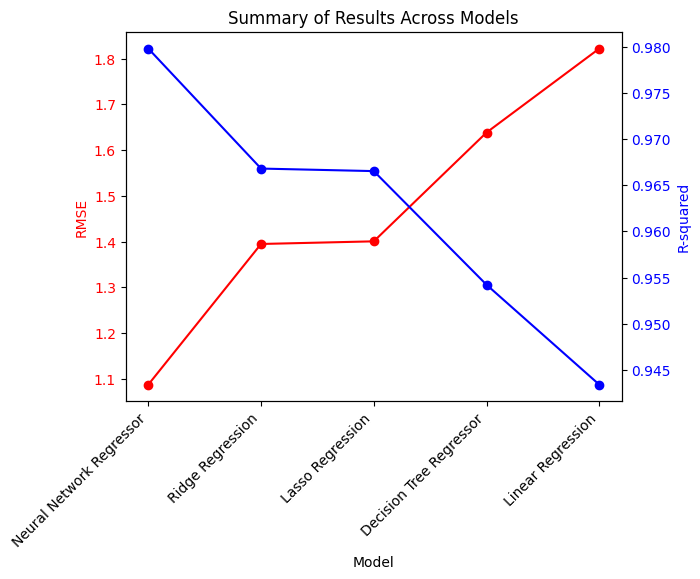

In [48]:
# plot results
fig, ax1 = plt.subplots()

# first column on left y-axis
ax1.plot(df_results['Model'], df_results['Test RMSE'], marker = 'o', color = 'red')
ax1.set_xlabel('Model')
plt.xticks(rotation = 45, ha = 'right')
ax1.set_ylabel('RMSE', color = 'red')
ax1.tick_params(axis = 'y', labelcolor = 'red')

# second column on right y-axis
ax2 = ax1.twinx()  # create a second y-axis sharing the same x-axis
ax2.plot(df_results['Model'], df_results['Test R-squared'], marker = 'o', color = 'blue')
ax2.set_ylabel('R-squared', color = 'blue')
ax2.tick_params(axis = 'y', labelcolor = 'blue')

plt.title('Summary of Results Across Models')
plt.savefig('images/Summary of Results Across Models')
plt.show()

**Summary of Modelling Results**

**Features:**
Selected features from the raw data included:
- Numerical Features (16 features): 'Age', 'AnnualIncome', 'CreditScore', 'LoanAmount', 'LoanDuration', 'MonthlyDebtPayments', 'CreditCardUtilizationRate', 'DebtToIncomeRatio', 'BankruptcyHistory', 'PreviousLoanDefaults', 'LengthOfCreditHistory', 'TotalAssets', 'TotalLiabilities', 'InterestRate', 'TotalDebtToIncomeRatio', 'LoanApproved'
- Categorical Features (5 features): 'EmploymentStatus', 'EducationLevel', 'MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose'.
- In total, 21 of 35 features from the dataset was used.

**Feature Transformation:**
- PCA was assessed - it did not reduce the dimensionality of the features significantly at a high degree of explained variance. Hence, PCA was not applied.
- Polynomial features was assessed for numerical features using Linear Regression (without regularisation), with degree 2 yielding the best results.
- One-Hot Encoding (OHE) was applied to categorical features.
- With polynomial degree-2 and OHE, there were a total of 173 features.

**Models:**  
Simple models are preferred for higher explainability and transparency. Four models were run on the cleaned dataset:
1) Linear Regression with polynomial features (degree: 1 to 3)
2) L2 regularisation using Ridge Regression with polynomial degree 2, alpha varied (0.001, 0.1, 1.0, 10.0, 100.0, 1000.0), and 5-fold cross validation.
3) L1 regularisation using Lasso Regression with polynomial degree 2, alpha varied (0.001, 0.1, 1.0, 10.0, 100.0, 1000.0), and 5-fold cross validation.
4) Decision Tree Regressor
5) Neural Network with two 64-unit hidden layers and ReLU activation function, trained with 100 epochs.

**Results:**  
1) Linear Regression (2-degree polynomial):
   - Train RMSE: 1.7876163291
   - Test RMSE: 1.8219835996
   - Train R-squared: 0.9475782789
   - Test R-squared: 0.9433845637

2) Ridge Regression (2-degree polynomial, alpha = 0.1):
   - Train RMSE: 1.3509618478
   - Test RMSE: 1.3948417871
   - Train R-squared: 0.9700602053
   - Test R-squared: 0.9668185141

3) Lasso Regression (2-degree polynomial, alpha = 0.001):
   - Train RMSE: 1.3601438327
   - Test RMSE: 1.4006076112
   - Train R-squared: 0.9696518430
   - Test R-squared: 0.9665436241

4) Decision Tree Regressor
   - Train RMSE: 0
   - Test RMSE: 1.6384474358
   - Train R-squared: 1
   - Test R-squared: 0.9542162926

5) Neural Network Regressor
   - Train RMSE: 0.996445
   - Test RMSE: 1.087417
   - Train R-squared: 0.983712
   - Test R-squared: 0.979833

The similarity of the Train and Test RMSE across all three Linear Regression models also showed that the models were not overfit. For Decision Tree Regressor, the perfect fit (zero Train RMSE) was expected due to the tendency for Decision Tree models to overfit.

Additionally, the RMSEs were well within 1 standard deviation (7.78) of the RiskScore of the training data, with very high R-squared. These indicate that the predictions have good accuracy.

**Model Selection:**  
With the lowest Test RMSE and highest R-squared, Neural Network Regressor performed the best.

RIdge Regression offers a strong alternative when explanability is critical.
Based on the selected Ridge Regression model:
- Top 3 features contributing to higher RiskScore: 'CreditScore', 'LengthOfCreditHistory^2', 'DebtToIncomeRatio'
- Top 3 features contributing to lower RiskScore: 'CreditScore^2', 'TotalAssets', 'LengthOfCreditHistory'

**Conclusion:**  
 Neural Network Regressor is the selected primary model for its outperforming predictive accuracy, while Ridge Regression is a good alternative that offers better explainability with slightly lower accuracy. While additional models can be tested for further improvements, the selected models are assessed to be accurate enough and can already be used to predict the Credit Risk Score.




## Deployment

Email to stakeholders on the business outcome achieved by the Credit Risk Score prediction model:

Dear Stakeholders,

I am pleased to share an update on the Credit Risk Score Prediction Model developed as part of our analytical initiative to enhance the Credit Assessment process for loans. The model is designed to help us estimate an applicant’s Credit Risk Score more accurately and consistently by analysing key financial and personal factors that influence repayment behaviour.

Implementing this model provides several important business benefits:
  
1.	Faster and more consistent decisions: The model can assess risk in seconds, reducing manual review time and ensuring that every applicant is evaluated using the same criteria.
  
2.	Improved risk management: By identifying higher-risk applicants more reliably, we can minimise potential loan defaults and protect the organisation from avoidable financial losses.
  
3.	Better customer targeting: The model helps us recognise applicants with strong credit potential, allowing us to approve quality loans more confidently and offer more competitive products to low-risk customers.
  
4.	High accuracy with interpretability options: The primary model provides highly accurate predictions by capturing complex patterns in applicant data, enabling more precise Credit Risk assessment. In parallel, a secondary, more interpretable model offers clear insights into the factors driving risk, supporting transparency and explainable decision-making when needed.
  
Overall, the deployment of this prediction model will strengthen our lending decisions, reduce operational costs, and support sustainable portfolio growth. I would be happy to discuss how this can be integrated into our existing workflows and the potential next steps for implementation.
  
Warm regards,  
Chee Siong

